In [ ]:
%run D:\codes\wrf_helen\read_wrf_helen.ipynb
%run D:\codes\confg
%run D:\codes\ukmo_plots.ipynb
%run D:\codes\icon_plots.ipynb

In [1]:
%%capture
import warnings
warnings.filterwarnings("ignore")

import xarray as xr

import metpy
import metpy.calc as mpcalc
import numpy as np
import pandas as pd
import wrf
from matplotlib import pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors


In [2]:
def connectpoints(x,y,p1,p2, color, ls, labell, zorder=1):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2], color, linestyle=ls, label=labell, zorder=1, linewidth=3)

# WRF

In [71]:
day = 16
hour = 3
minute = 0
day = str(day)

formatted_hour = f"{hour:02d}"
if minute not in [0, 30]:
    raise ValueError("Ony 0 or 30 min are possibile. Values available only for full hour or half hour")
formatted_min = f"{minute:02d}"

date = f"201710{day}"
my_time = f"{date}T{formatted_hour}{formatted_min}Z"
filepath2 = f"{wrf_folder}/WRF_ACINN_{date}/WRF_ACINN_20171015T1200Z_CAP02_3D_30min_1km_HCW_{my_time}.nc"

ds = __open_wrf_dataset_my_version(filepath2)

In [72]:
wrf_lat_min = ds.lat[0][0].values
wrf_lat_max = ds.lat[0][-1].values
wrf_lon = ds.lon[0][0].values

In [73]:
wrf_x = np.array([np.min(wrf_lon), np.min(wrf_lon), np.max(wrf_lon), np.max(wrf_lon)])
wrf_y = np.array([np.min(wrf_lat_min), np.max(wrf_lat_max), np.min(wrf_lat_min), np.max(wrf_lat_max)])
wrf_x

array([ 6.289856,  6.289856, 16.510132, 16.510132], dtype=float32)

# UKMO

In [7]:
dat = xr.open_dataset(f"{ukmo_folder}/MetUM_MetOffice_20171015T1200Z_CAP02_3D_30min_1km_optimal_v.nc")

um_lon = dat.projection_x_coordinate[0].values
um_lat_min = dat.projection_y_coordinate[0].values
um_lat_max = dat.projection_y_coordinate[-1].values

In [8]:
um_x = np.array([np.min(um_lon), np.min(um_lon), np.max(um_lon), np.max(um_lon)])
um_y = np.array([np.min(um_lat_min), np.max(um_lat_max), np.min(um_lat_min), np.max(um_lat_max)])

# ICON

In [9]:
icon_file = f'ICON_BLM-GUF_20171015T1200Z_CAP02_2D-3D_10min_1km_all_201710{day}T{formatted_hour}0000Z.nc'
ds_icon = xr.open_dataset(f"{icon_folder_3D}/{icon_file}")

In [10]:
icon_lon = np.zeros(len(ds_icon.clon.values))
for i in range(len(ds_icon.clon.values)):
    icon_lon[i] = math.degrees(ds_icon.clon.values[i])
icon_lat = np.zeros(len(ds_icon.clat.values))
for i in range(len(ds_icon.clat.values)):
    icon_lat[i] = math.degrees(ds_icon.clat.values[i])

In [11]:
icon_x = np.array([np.min(icon_lon), np.min(icon_lon), np.max(icon_lon), np.max(icon_lon)])
icon_y = np.array([np.min(icon_lat), np.max(icon_lat), np.min(icon_lat), np.max(icon_lat)])

# ICON 2TE

In [12]:
icon2TE_file = f'ICON_2TE_BLM-GUF_20171015T1200Z_CAP02_2D-3D_10min_1km_all_201710{day}T{formatted_hour}0000Z.nc'
ds_icon2TE = xr.open_dataset(f"{icon2TE_folder_3D}/{icon2TE_file}")

In [13]:
icon2TE_lon = np.zeros(len(ds_icon2TE.clon.values))
for i in range(len(ds_icon2TE.clon.values)):
    icon2TE_lon[i] = math.degrees(ds_icon2TE.clon.values[i])
icon2TE_lat = np.zeros(len(ds_icon2TE.clat.values))
for i in range(len(ds_icon2TE.clat.values)):
    icon2TE_lat[i] = math.degrees(ds_icon2TE.clat.values[i])

In [14]:
icon2TE_x = np.array([np.min(icon2TE_lon), np.min(icon2TE_lon), np.max(icon2TE_lon), np.max(icon2TE_lon)])
icon2TE_y = np.array([np.min(icon2TE_lat), np.max(icon2TE_lat), np.min(icon2TE_lat), np.max(icon2TE_lat)])

# AROME

In [15]:
datasets = []  # List to hold the interpolated datasets for each variable
import os
variables = ["p", "q", "th", "u", "v", "z"]
for var in variables:
    file_path = os.path.join(dir_3D_AROME, f"AROME_Geosphere_20171015T1200Z_CAP02_3D_30min_1km_best_{var}.nc")
    ds = xr.open_dataset(file_path)
arome_lon = ds.longitude.values[0][0]
armoe_lat_min = ds.latitude.values[0][0][0]
armoe_lat_max = ds.latitude.values[0][-1][0]

In [16]:
arome_x = np.array([np.min(arome_lon), np.min(arome_lon), np.max(arome_lon), np.max(arome_lon)])
arome_y = np.array([armoe_lat_min, armoe_lat_max, armoe_lat_min, armoe_lat_max])

# plot

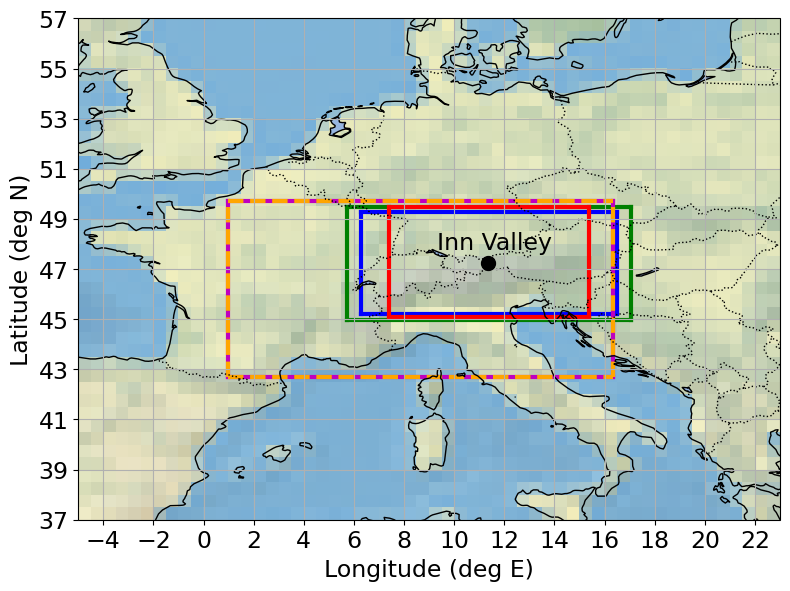

In [51]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-5, 23, 37, 57], crs=ccrs.PlateCarree())
ax.stock_img()

# Add terrain and natural features to the map
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

ax.grid()
ax.set_xlabel('Longitude (deg E)', fontsize=17)
ax.set_ylabel('Latitude (deg N)', fontsize=17)
ax.set_xticks(np.concatenate([np.array([-4,-2,]),np.arange(0,24,2)]))  # Longitudes
ax.set_yticks(np.arange(37,58,2))
# ax.set_xlim(9,15)
# ax.set_ylim(45,49)


# ax.plot(12.162778, 47.575279, 'o', c='k', markersize=7, label='Kufstein')
# ax.plot(10.7218, 47.2419, 'o', c='k', markersize=7, label='Imst')
ax.plot(11.3553, 47.2598, 'o', c='k', markersize=10)
plt.text(9.3, 47.8, 'Inn Valley', fontsize=17)
# plt.text(12.25, 47.45, 'Kufstein')
# plt.text(10.4, 47.1, 'Imst')


#WRF
connectpoints(wrf_x,wrf_y,0,1, 'b', '-','WRF')
connectpoints(wrf_x,wrf_y,2,3, 'b', '-','_f')
connectpoints(wrf_x,wrf_y,0,2, 'b', '-','_f')
connectpoints(wrf_x,wrf_y,1,3, 'b', '-','_f')
#UM
connectpoints(um_x,um_y,0,1, 'g', '-','UM')
connectpoints(um_x,um_y,2,3, 'g', '-','_f')
connectpoints(um_x,um_y,0,2, 'g', '-','_f')
connectpoints(um_x,um_y,1,3, 'g', '-','_f')
#ICON2TE
connectpoints(icon2TE_x,icon2TE_y,0,1, 'm', '-','ICON2TE')
connectpoints(icon2TE_x,icon2TE_y,2,3, 'm', '-','_f')
connectpoints(icon2TE_x,icon2TE_y,0,2, 'm', '-','_f')
connectpoints(icon2TE_x,icon2TE_y,1,3, 'm', '-','_f')
#ICON
connectpoints(icon_x,icon_y,0,1, 'orange', 'dashed','ICON')
connectpoints(icon_x,icon_y,2,3, 'orange', 'dashed','_f')
connectpoints(icon_x,icon_y,0,2, 'orange','dashed','_f')
connectpoints(icon_x,icon_y,1,3, 'orange','dashed','_f')
#AROME
connectpoints(arome_x,arome_y,0,1, 'r', '-','AROME')
connectpoints(arome_x,arome_y,2,3, 'r', '-','_f')
connectpoints(arome_x,arome_y,0,2, 'r', '-','_f')
connectpoints(arome_x,arome_y,1,3, 'r', '-','_f')

#ax.legend()

ax.tick_params(axis='both', which='major', labelsize=17)

plt.autolayout : True
plt.tight_layout()


plt.savefig("D:/presentation/map_domains.png")

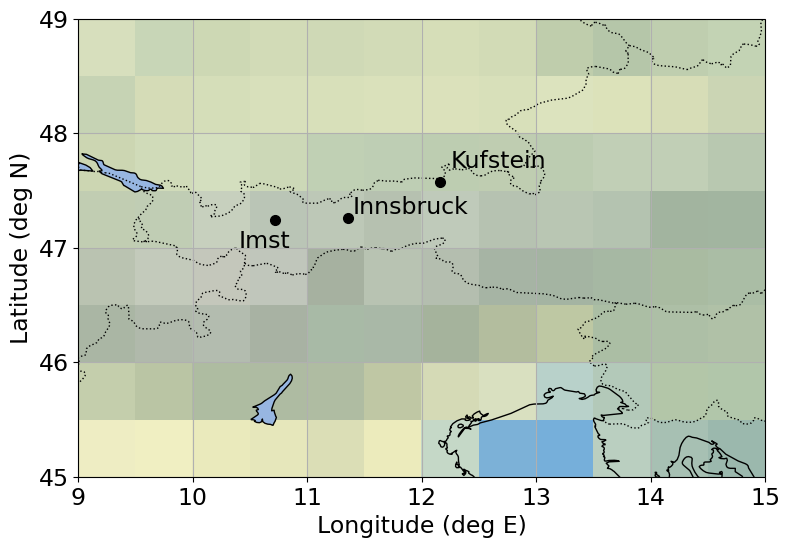

In [52]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([9, 15, 45, 49], crs=ccrs.PlateCarree())
ax.stock_img()

# Add terrain and natural features to the map
ax.add_feature(cfeature.LAND, edgecolor='black', lw=20)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

ax.grid()
ax.set_xlabel('Longitude (deg E)', fontsize=17)
ax.set_ylabel('Latitude (deg N)', fontsize=17)
ax.set_xticks([9, 10, 11, 12, 13, 14, 15])  # Longitudes
ax.set_yticks([45, 46, 47, 48, 49])
ax.set_xlim(9,15)
ax.set_ylim(45,49)


ax.plot(12.162778, 47.575279, 'o', c='k', markersize=7, label='Kufstein')
ax.plot(10.7218, 47.2419, 'o', c='k', markersize=7, label='Imst')
ax.plot(11.3553, 47.2598, 'o', c='k', markersize=7, label='Innsbruck')
# plt.text(11.4, 47.3, 'Innsbruck', fontsize=17)
# plt.text(12.25, 47.45, 'Kufstein', fontsize=17)
# plt.text(10.4, 47.1, 'Imst', fontsize=17)

plt.text(11.4, 47.3, 'Innsbruck', fontsize=17)
plt.text(12.25, 47.7, 'Kufstein', fontsize=17)
plt.text(10.4, 47., 'Imst', fontsize=17)

ax.tick_params(axis='both', which='major', labelsize=17)

plt.autolayout : True
plt.tight_layout()

plt.savefig("D:/presentation/map.png")